In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [117]:
np.random.seed(42)
n_samples = 500
n_features = 8

X = np.random.randn(n_samples, n_features)
beta = np.random.uniform(-2,2,n_features)
Y = X @ beta + np.random.randn(n_samples) * 0.5

In [116]:
beta

array([-0.05992805, -1.65838788,  1.88984556,  0.07204173,  0.45674498,
       -1.05356087, -0.06600766, -0.28340203])

In [118]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [119]:
slopes = np.zeros(n_features)
for i in range(n_features):
    model = LinearRegression().fit(X[:, i].reshape(-1, 1), Y)
    slopes[i] = model.coef_[0]

In [120]:
slopes

array([-0.08297635, -1.71855682,  2.04627233,  0.08017228,  0.42999567,
       -1.02266629, -0.15423229, -0.33314922])

In [121]:
X_scaled = X * slopes
pca_scaled = PCA(n_components=2)
X_spca = pca_scaled.fit_transform(X_scaled)

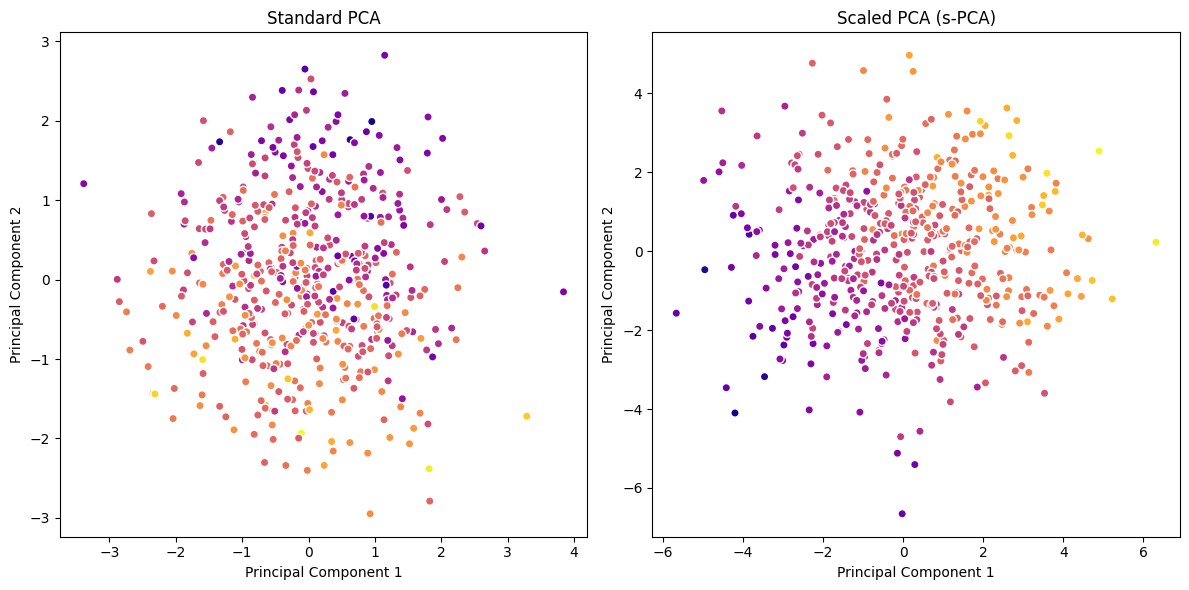

In [122]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = Y, cmap = 'plasma', edgecolor='w')
plt.title('Standard PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_spca[:, 0], X_spca[:, 1], c = Y, cmap = 'plasma', edgecolor='w')
plt.title('Scaled PCA (s-PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()


### Without PCA

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

0.24438056105438227

### With PCA

In [113]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = model_pca.predict(X_test_pca)
mean_squared_error(y_test_pca, y_pred_pca)

5.208457029726584

### With s-PCA

In [114]:
X_train_spca, X_test_spca, y_train_spca, y_test_spca = train_test_split(X_spca, Y, test_size=0.2, random_state=42)

model_spca = LinearRegression()
model_spca.fit(X_train_spca, y_train_spca)

y_pred_spca = model_spca.predict(X_test_spca)
mean_squared_error(y_test_spca, y_pred_spca)

1.431595697244051